In [126]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import json
import json
import numpy as np
mpl.rcParams['axes.prop_cycle'] = mpl.cycler(color=["royalblue", "orchid", "limegreen"])

In [2]:
curve_df = pd.read_csv("data/curve/last_model_curve", names=["model", "epoch", "test_acc"])
fps_df = pd.read_csv("data/fps/last_model_fps", names=["model", "epoch", "test_acc"])

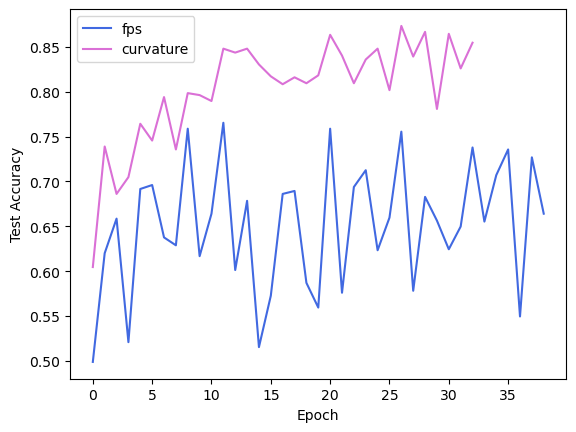

In [3]:
plt.figure()
plt.plot(fps_df["test_acc"],label="fps")
plt.plot(curve_df["test_acc"],label="curvature")
plt.legend()
plt.xlabel("Epoch")
plt.ylabel("Test Accuracy")
plt.show()

Cloudsize

In [123]:
curve_df = pd.read_csv("data/true_cloud.txt", names=["n_points", "n_epochs", "bias","k","test_acc"])
fps_df = pd.read_csv("data/true_fps.txt", names=["n_points", "n_epochs", "bias","k","test_acc"])
fps_df

,n_points,n_epochs,bias,k,test_acc
0,2048,50,0.0,10,"[0.6255506873130798, 0.6563876867294312, 0.802..."
1,1024,50,0.0,10,"[0.6552863717079163, 0.7665198445320129, 0.747..."
2,512,50,0.0,10,"[0.5616739988327026, 0.7015418410301208, 0.761..."
3,128,50,0.0,10,"[0.39757710695266724, 0.5506607890129089, 0.64..."
4,32,50,0.0,10,"[0.19162996113300323, 0.3138766586780548, 0.41..."


In [97]:
test = curve_df["test_acc"][0]

Final performance

In [99]:
def eval_string(df, n_points):
    return json.loads(df[df["n_points"]==n_points]["test_acc"].item())

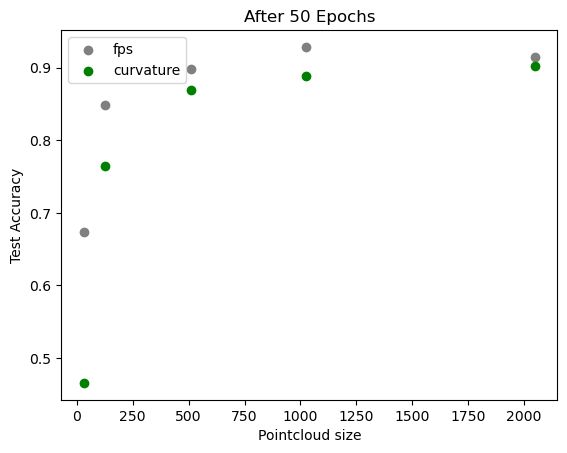

In [113]:
# only looking at final performance
plt.figure()
for n_points in fps_df["n_points"]:
    plt.scatter(n_points,eval_string(fps_df, n_points)[-1],color="grey")
    plt.scatter(n_points,eval_string(curve_df, n_points)[-1],color="green")

# plt.plot(curve_df["test_acc"],label="curvature")
plt.scatter([], [], color="grey", label="fps")
plt.scatter([], [], color="green", label="curvature")

plt.legend()
plt.title("After 50 Epochs")
plt.xlabel("Pointcloud size")
plt.ylabel("Test Accuracy")
plt.show()

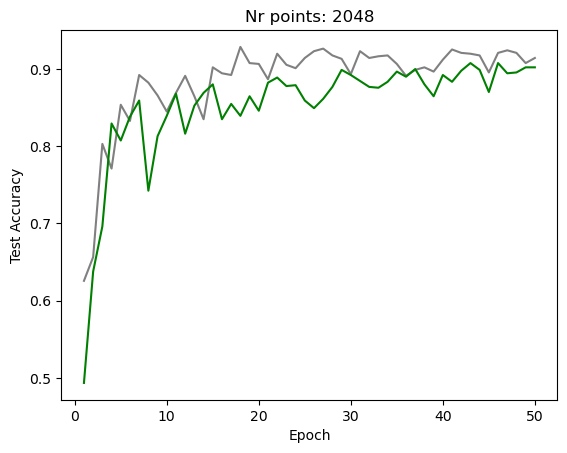

In [136]:
n_points = 2048
plt.figure()
# for n_points in curve_df["n_points"]:
plt.plot(range(1,51),eval_string(fps_df, n_points),color="grey")
plt.plot(range(1,51),eval_string(curve_df, n_points),color="green")
plt.title(f"Nr points: {n_points}")
plt.xlabel("Epoch")
plt.ylabel("Test Accuracy")
plt.show()

Learning speed

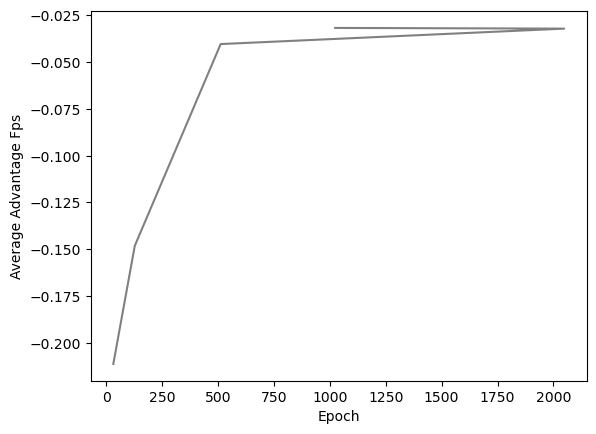

In [133]:
res = []
for n_points in curve_df["n_points"]:
    res.append(np.mean(np.array(eval_string(curve_df, n_points)) - np.array(eval_string(fps_df, n_points))))

plt.figure()
plt.plot(curve_df.n_points,res,color="grey")
plt.title(f"")
plt.xlabel("Epoch")
plt.ylabel("Average Advantage Fps")
plt.show()

In [140]:
# 5473568281938326
eval_string(curve_df, 1024)

[0.5473568439483643,
 0.7334801554679871,
 0.7070484757423401,
 0.7621145248413086,
 0.7698237895965576,
 0.8392070531845093,
 0.8248898386955261,
 0.8325991034507751,
 0.8138766288757324,
 0.8325991034507751,
 0.8491189479827881,
 0.8414096832275391,
 0.8436123132705688,
 0.7984581589698792,
 0.8678414225578308,
 0.8711453676223755,
 0.8722466826438904,
 0.8006607890129089,
 0.8744493126869202,
 0.8678414225578308,
 0.8755506873130798,
 0.8733479976654053,
 0.8711453676223755,
 0.884361207485199,
 0.8678414225578308,
 0.8810572624206543,
 0.8898678421974182,
 0.8480176329612732,
 0.8711453676223755,
 0.892070472240448,
 0.8854625821113586,
 0.8876652121543884,
 0.8766520023345947,
 0.8777533173561096,
 0.899779736995697,
 0.8909691572189331,
 0.8854625821113586,
 0.8909691572189331,
 0.9030836820602417,
 0.8931717872619629,
 0.8689427375793457,
 0.9041849970817566,
 0.83370041847229,
 0.8898678421974182,
 0.8810572624206543,
 0.8942731022834778,
 0.8964757919311523,
 0.888766527175903